# The Shor Code

<div style="width:100%;text-align:right;font-size:0.75em;opacity:0.2">Latex macros</div>
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\bra}[1]{\langle #1|} $
$\newcommand{\iu}{{i\mkern1mu}}$
$ \newcommand{\e}{\mathrm{e}}$
$\newcommand{\bigo}{\mathcal{O}}$
$\newcommand{\set}[1]{\{#1\}}$
$\newcommand{\oper}[1]{\mathcal{#1}}$
$\newcommand{\st}[1]{\mathcal{#1}}$
$\newcommand{\vecs}[1]{\mathcal{#1}}$
$\newcommand{\group}[1]{\mathcal{#1}}$
$\newcommand{\union}{\hspace{0.25em}\cup\hspace{0.25em}}$

It is now time to construct a code that correct more than one type of error. This will also give us the opportunity to show off a code construction technique called code concatenation.

In code concatenation, we first encode the logical qubit using a particular code into $n$ data qubits. Then, we encode each of then $n$ data qubits individually using the same or another code. To illustrate this, recall that, in the phase-flip code the logical basis states are encoded as
\begin{align}
  \ket{0} \to \ket{\bar{0}} = \ket{+++}, \\
  \ket{1} \to \ket{\bar{1}} = \ket{---}. 
\end{align}
Now, we are going to take each of the three data qubits and encode them using the bit-flip repetition code. Recall that in the bit-flip repetition code, the plus and minus states encode as
\begin{align}
  \ket{+} &= \frac{\ket{0} + \ket{1}}{\sqrt{2}} \to \ket{\bar{+}} = \frac{\ket{000} + \ket{111}}{\sqrt{2}}, \\
  \ket{-} &= \frac{\ket{0} - \ket{1}}{\sqrt{2}} \to \ket{\bar{-}} = \frac{\ket{000} - \ket{111}}{\sqrt{2}}.
\end{align}
When we apply this encoding to each of the three qubits in the phase-flip encoding, we obtain
\begin{align}
  \ket{+++} \to \ket{\bar{\bar{0}}} = \frac{(\ket{000} + \ket{111})(\ket{000} + \ket{111})(\ket{000} + \ket{111})}{2\sqrt{2}}, \\
  \ket{---} \to \ket{\bar{\bar{1}}} = \frac{(\ket{000} - \ket{111})(\ket{000} - \ket{111})(\ket{000} - \ket{111})}{2\sqrt{2}}.
\end{align}
Visually, we can draw a tree diagram to show how one qubit is first encoded into three via the phase-flip code and then each of the three qubits is encoded into three more via the bit-flip code.

![Shor code concatenation](../../images/shorcodeconcatenation.png)


Here we refer to the phase-flip code as the *outer* code (level 1) and the bit-flip code as the *inner* code (level 2). 

### Encoding
This combined action that maps one logical qubit to the state of nine qubits as
\begin{align}
  \ket{0} \to \ket{\bar{\bar{0}}} = \frac{(\ket{000} + \ket{111})(\ket{000} + \ket{111})(\ket{000} + \ket{111})}{2\sqrt{2}}, \\
  \ket{1} \to \ket{\bar{\bar{1}}} = \frac{(\ket{000} - \ket{111})(\ket{000} - \ket{111})(\ket{000} - \ket{111})}{2\sqrt{2}},
\end{align}
defines the encoding for the Shor code.

#### Task 1
Create the encoding circuit for the Shor code. You will use nine qubits.

1. Apply the phase-flip repetition code's encoding circuit to qubits 0, 3, 6.
2. Apply the bit-flip repetition code's encoding circuit to 
    * qubits 0,1,2
    * qubits 3,4,5
    * qubits 6,7,8

Then use the `circ.simulate()` method to check if you get the correct output.

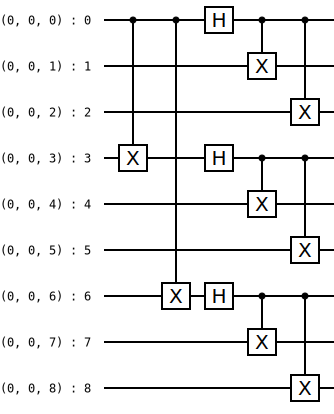

In [1]:
import stac
enc_circ = stac.Circuit.simple(9)
enc_circ.append('CX', 0, 3)
enc_circ.append('CX', 0, 6)
for i in range(3):
    enc_circ.append('H', 3*i)
enc_circ.append('CX', 0, 1)
enc_circ.append('CX', 3, 4)
enc_circ.append('CX', 6, 7)
enc_circ.append('CX', 0, 2)
enc_circ.append('CX', 3, 5)
enc_circ.append('CX', 6, 8)
enc_circ.draw()


In [2]:
enc_circ.simulate()

    basis    amplitude
---------  -----------
000000000        0.354
111000000        0.354
000111000        0.354
111111000        0.354
000000111        0.354
111000111        0.354
000111111        0.354
111111111        0.354


*Question:* Construct the basis states of a nine-qubit code with the bit-flip code as the outer code and the phase-flip code as the inner code.

**Solve:**

Recall that in the bit-flip repetition code, the plus and minus states encode as
\begin{align}
  \ket{+} &= \frac{\ket{0} + \ket{1}}{\sqrt{2}} \to \ket{\bar{+}} = \frac{\ket{000} + \ket{111}}{\sqrt{2}}, \\
  \ket{-} &= \frac{\ket{0} - \ket{1}}{\sqrt{2}} \to \ket{\bar{-}} = \frac{\ket{000} - \ket{111}}{\sqrt{2}}.
\end{align}
When we apply this encoding to each of the three qubits in the phase-flip encoding, we obtain
\begin{align}
  \ket{+++} \to \ket{\bar{\bar{0}}} = \frac{(\ket{000} + \ket{111})(\ket{000} + \ket{111})(\ket{000} + \ket{111})}{2\sqrt{2}}, \\
  \ket{---} \to \ket{\bar{\bar{1}}} = \frac{(\ket{000} - \ket{111})(\ket{000} - \ket{111})(\ket{000} - \ket{111})}{2\sqrt{2}}.
\end{align}

### Errors and decoding
We will now show that this code can correct every possible single-qubit error. Let's first show that it can correct bit-flip and phase-flip errors on any of the nine data qubits.

#### $X$-errors
Suppose a single-qubit $X$ error occurs, on say the fourth qubit.
\begin{align}
  X_4\ket{\bar{\bar{0}}} = \frac{(\ket{000} + \ket{111})(\ket{010} + \ket{101})(\ket{000} + \ket{111})}{2\sqrt{2}}, \\
  X_4\ket{\bar{\bar{1}}} = \frac{(\ket{000} - \ket{111})(\ket{010} - \ket{101})(\ket{000} - \ket{111})}{2\sqrt{2}},
\end{align}
How can one detect that this occur occured? We will do the following syndrome measurements, in the style of the bit-flip code.

* Compare the values of qubits 0,1,2
* Compare the values of qubits 3,4,5
* Compare the values of qubits 6,7,8

In this example, comparing the value of the 3rd qubit with the 4th, and the 4th with the 5th will show that the 3rd qubit has a different value. The error can be fixed as before.

#### Task 2
Create the syndrome measurement circuit for detecting $X$ errors in the Shor code.

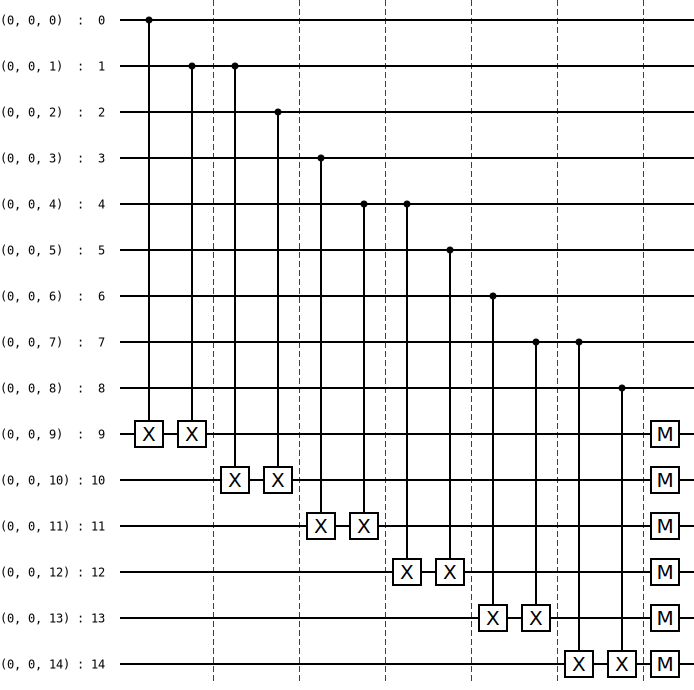

In [3]:
# specify how many qubits you will need
sync_circ_x = stac.Circuit.simple(15)
sync_circ_x.append('CX', 0, 9)
sync_circ_x.append('CX', 1, 9)
sync_circ_x.append('TICK')
sync_circ_x.append('CX', 1, 10)
sync_circ_x.append('CX', 2, 10)
sync_circ_x.append('TICK')
sync_circ_x.append('CX', 3, 11)
sync_circ_x.append('CX', 4, 11)
sync_circ_x.append('TICK')
sync_circ_x.append('CX', 4, 12)
sync_circ_x.append('CX', 5, 12)
sync_circ_x.append('TICK')
sync_circ_x.append('CX', 6, 13)
sync_circ_x.append('CX', 7, 13)
sync_circ_x.append('TICK')
sync_circ_x.append('CX', 7, 14)
sync_circ_x.append('CX', 8, 14)
sync_circ_x.append('TICK')
sync_circ_x.append('M', 9)
sync_circ_x.append('M', 10)
sync_circ_x.append('M', 11)
sync_circ_x.append('M', 12)
sync_circ_x.append('M', 13)
sync_circ_x.append('M', 14)
sync_circ_x.draw()

#### $Z$-errors
The case for a single-qubit $Z$ errors is slightly more difficult to see. Note, for instance, that if a $Z$ error occurs on any one of the first three qubits, the sign in the first block will change. For $i = 0,1,2$,
\begin{align}
  Z_i\ket{\bar{\bar{0}}} = \frac{(\ket{000} - \ket{111})(\ket{000} + \ket{111})(\ket{000} + \ket{111})}{2\sqrt{2}}, \\
  Z_i\ket{\bar{\bar{1}}} = \frac{(\ket{000} + \ket{111})(\ket{000} - \ket{111})(\ket{000} - \ket{111})}{2\sqrt{2}}.
\end{align}
A different way of seeing it is at the outer code level, where the encoding is
\begin{align}
  \ket{\bar{\bar{0}}} = \ket{\bar{+}}\ket{\bar{+}}\ket{\bar{+}}, \\
  \ket{\bar{\bar{1}}} = \ket{\bar{-}}\ket{\bar{-}}\ket{\bar{-}}.
\end{align}
Then the action of $Z_i$ for $i=0,1,2$ is
\begin{align}
  Z_i\ket{\bar{\bar{0}}} = \ket{\bar{-}}\ket{\bar{+}}\ket{\bar{+}}, \\
  Z_i\ket{\bar{\bar{1}}} = \ket{\bar{+}}\ket{\bar{-}}\ket{\bar{-}}.
\end{align}
At this level, it is quite easy to see the error-detecting strategy. Apply the phase-flip code's error-detection procedure to the three encoded qubits (at the outer level). We will discuss how one can do this later.

#### $Y$-errors
Right now, we want to show that the Shor code can detect and correct errors beyond just $X$ and $Z$ errors. One such error is the $Y$ error, which is just $Y = \iu ZX$, i.e. a combined bit-flip and phase-flip error. For instance, $Y_4$ will result in the corrupted basis states
\begin{align}
  Y_4\ket{\bar{\bar{0}}} = \iu \frac{(\ket{000} + \ket{111})(\ket{010} - \ket{101})(\ket{000} + \ket{111})}{2\sqrt{2}}, \\
  Y_4\ket{\bar{\bar{1}}} = \iu \frac{(\ket{000} - \ket{111})(\ket{010} + \ket{101})(\ket{000} - \ket{111})}{2\sqrt{2}},
\end{align}


This error is detected at both the $X$ detection stage, and the $Z$ detection stage, and corrected at both as well. First, we detect $X$ errors, find that the fourth is flipped and fix it. Then we detect $Z$ errors and determine that the middle block has experienced an error and fix it.


Hence, we have shown up till now that the Shor code can correct all errors in the set,
\begin{equation}
  \st{E} = I \union \set{X_i}_i \union \set{Y_i}_i \union \set{Z_i}_i, \quad i = 0,\dots,8.
\end{equation}

#### More general errors
We showed before that the bit-flip code could also correct for $X$ rotation errors. By the same arguments of linearity and collapse, the Shor code (and most quantum codes we will encounter) can correct any error which is of the form,
\begin{equation}
  E_i = e_0 I + e_1X_i + e_2 Y_i + e_3Z_i.
\end{equation}

#### Task 3 (On paper)
Apply $E_i$ to $\ket{\bar\psi}$ and then show that the error-detection circuit will collapse the state to just one of the possible errors.

**Solve:**

\begin{equation}
  E_i = e_0 I + e_1X_i + e_2 Y_i + e_3Z_i.
\end{equation}

$E_i$ represents sets of one qubit error. Since, operators in quantum mechanics are linear and errors are unique, so if $E_i$ operates on $\ket{\bar\psi}$, then the outcome will be either $I$ error or $X_i$ error or $Y_i$ or $Z_i$ error. Since, Shor code can detect all of the four errors, so the outcome will be just one of the possible errors. 

*Question:* Suppose the state $\ket{\bar\psi}$ encoded by the Shor code undergoes the two-qubit error $Z_1Z_2$. What is the impact of this error? This is a phenomena not seen in classical codes.


**Solve:**

If the state undergoes the two-qubit error $Z_1Z_2$, then the state will remain as before. So, no change will be detected by the error correction code. The impact of this error is equivalent to no error. 


For example, if $Z_1Z_2$ acts upon $\ket{\bar{\bar{0}}}$, 
\begin{align}
  Z_1Z_2\ket{+++} \to Z_1Z_2\ket{\bar{\bar{0}}} = Z_1Z_2\frac{(\ket{000} + \ket{111})(\ket{000} + \ket{111})(\ket{000} + \ket{111})}{2\sqrt{2}}, \\
  =\frac{(\ket{000} + \ket{(-1)(-1)1})(\ket{000} + \ket{111})(\ket{000} + \ket{111})}{2\sqrt{2}}. \\
  =\frac{(\ket{000} + \ket{111})(\ket{000} + \ket{111})(\ket{000} + \ket{111})}{2\sqrt{2}}.
\end{align}

Similarly, if $Z_1Z_2$ acts upon $\ket{\bar{\bar{1}}}$, then,
\begin{align} 
  Z_1Z_2\ket{---} \to Z_1Z_2\ket{\bar{\bar{1}}} = Z_1Z_2\frac{(\ket{000} - \ket{111})(\ket{000} - \ket{111})(\ket{000} - \ket{111})}{2\sqrt{2}}, \\
  =\frac{(\ket{000} - \ket{(-1)(-1)1})(\ket{000} - \ket{111})(\ket{000} - \ket{111})}{2\sqrt{2}}. \\
  =\frac{(\ket{000} - \ket{111})(\ket{000} - \ket{111})(\ket{000} - \ket{111})}{2\sqrt{2}}.
\end{align}

The effect of $Z_4Z_5, Z_7Z_8$, or $Z_2Z_3$ etc. are same. They dont cause any error because they dont change the original state.

This is a phenomena not seen in classical codes. Because phase flip doesnt occur in classical codes.


*Question:* The Shor can correct some (but not all) two-qubit errors as well. Characterize all these errors. Is there any three-qubit error that the Shor code can handle?

**Solve:**

Shor code can correct two-qubit errors. This includes two-qubit phase flip errors. Becuase the effect of such error is no error. For example, when two qubits experience the phase flip error, the outcome is no change in the state. So, two-qubit phase flip can be corrected using Shor code.

For example, if $Z_1Z_2$ acts upon $\ket{\bar{\bar{0}}}$, 
\begin{align}
  Z_1Z_2\ket{+++} \to Z_1Z_2\ket{\bar{\bar{0}}} = Z_1Z_2\frac{(\ket{000} + \ket{111})(\ket{000} + \ket{111})(\ket{000} + \ket{111})}{2\sqrt{2}}, \\
  =\frac{(\ket{000} + \ket{(-1)(-1)1})(\ket{000} + \ket{111})(\ket{000} + \ket{111})}{2\sqrt{2}}. \\
  =\frac{(\ket{000} + \ket{111})(\ket{000} + \ket{111})(\ket{000} + \ket{111})}{2\sqrt{2}}.
\end{align}

 
Similarly, if $Z_1Z_2$ acts upon $\ket{\bar{\bar{1}}}$, then,
\begin{align} 
  Z_1Z_2\ket{---} \to Z_1Z_2\ket{\bar{\bar{1}}} = Z_1Z_2\frac{(\ket{000} - \ket{111})(\ket{000} - \ket{111})(\ket{000} - \ket{111})}{2\sqrt{2}}, \\
  =\frac{(\ket{000} - \ket{(-1)(-1)1})(\ket{000} - \ket{111})(\ket{000} - \ket{111})}{2\sqrt{2}}. \\
  =\frac{(\ket{000} - \ket{111})(\ket{000} - \ket{111})(\ket{000} - \ket{111})}{2\sqrt{2}}.
\end{align}

The effect of $Z_4Z_5, Z_7Z_8$, or $Z_2Z_3$ etc. are same. They dont cause any error because they dont change the original state.

Also, three qubit phase flip can be corrected by Shor code. Because the effect of such error is similar to one-qubit phase flip error. 
For example, if $Z_1Z_2Z_3$ acts upon $\ket{\bar{\bar{0}}}$,
\begin{align}
  Z_1Z_2Z_3\ket{+++} \to Z_1Z_2Z_3\ket{\bar{\bar{0}}} = Z_1Z_2Z_3\frac{(\ket{000} + \ket{111})(\ket{000} + \ket{111})(\ket{000} + \ket{111})}{2\sqrt{2}}, \\
  =\frac{(\ket{000} + \ket{(-1)(-1)(-1)})(\ket{000} + \ket{111})(\ket{000} + \ket{111})}{2\sqrt{2}}. \\
  =\frac{(\ket{000} - \ket{111})(\ket{000} + \ket{111})(\ket{000} + \ket{111})}{2\sqrt{2}}.
\end{align}

Now, if we see the effect of one-qubit phase flip error, we will find that the outcome of three qubit phase flip and one qubit phase flip errors are exactly same.
So, if $Z_1$ or $Z_2$ or $Z_3$ acts upon $\ket{\bar{\bar{0}}}$, then, 
\begin{align}
  Z_1\ket{\bar{\bar{0}}} = \frac{(\ket{000} - \ket{111})(\ket{000} + \ket{111})(\ket{000} + \ket{111})}{2\sqrt{2}},   
\end{align}

As expected, the result of three qubit and one qubit phase flip are same. Since, Shor code can correct one qubit phase flip, so it is possible to correct three qubit phase flip with this code as well. 